# APS 7 - Teste AB

Integrantes:

**Fernando Sanches**

**Maurício Ando**

**Theo Barbara**

Deadline: **24/10**

Fazer junto com o grupo que levantou as amostras de *co-design*

### Teste AB via permutação

Agora que você sabe como fazer testes de permutação, realize um teste de diferença de médias entre as versões $A$ e $B$ 

**1.**  Descreva o que era diferente nas versões $A$ e $B$ do seu projeto. Incluir screenshots

Dica: o Jupyter Notebook deixa realizar *paste* de imagens

Em ambas as versões, o usuário devia clicar em "Vamos jogar". Na página do tipo A, a palavra aparecia logo no final do texto explicativo, com cor preta. 

![title](assets/img/tipo_a.JPG)


Já na versão B, a expressão aparece com cor branca, dando mais destaque à palavra. 

![title](assets/img/tipo_b.JPG)

**2.** Leia o arquivo *JSON* e o converta em *DataFrame*. Veja os exemplos na pasta [TesteAB](./TesteAB).

In [2]:
import json
import numpy as np

arquivo = open("codes.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados = json.loads(texto)

**3.** Separe os tempos *elapsed* em duas listas, $A$ e $B$

In [3]:
A=[]
B=[]
for item in dados.items():
    if item[1]['filename']=='ProjetoDessofta.html':
        A.append(item[1]['elapsed'])
    else:
        B.append(item[1]['elapsed'])
B

[2230,
 4752,
 4450,
 29327,
 7852,
 31335,
 31531,
 20563,
 16549,
 11943,
 2313,
 12471,
 113143,
 2061,
 3459,
 22834,
 26138,
 26850,
 4148,
 10605,
 14980,
 4472,
 7157,
 8414,
 8942,
 2388860,
 48982,
 2929,
 2244,
 4149,
 21399,
 5247,
 36427,
 40548]

**4.** Formule a hipótese nula e a hipótese alternativa para comparar as duas amostras

In [4]:
dobs=np.mean(A)-np.mean(B)
dobs

8074.768907563033

<b>Hipótese nula:</b> Não faz diferença ter duas versões: dobs = 8074,77

<b>Hipótese alternativa:</b> Faz diferença ter duas versões: dobs ≠ 8074,77

**5.** Realize um teste de permutação e indique o *p-value*

O p-value é: 0.3387096774193548


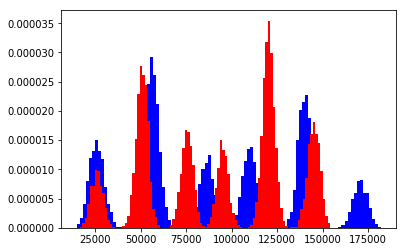

In [5]:
#Teste de permutação caso 1, pois estamos comparando duas coisas "iguais", isto é, estamos comparando o tempo em A e em B. 
import random
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
na=len(A)
nb=len(B)

mediaA=[]
mediaB=[]

C=A+B

for i in range(10000):
    np.random.shuffle(C)
    mediaA.append(np.mean(C[0:na]))
    mediaB.append(np.mean(C[na:]))
plt.hist(mediaA, density=True, bins=100, color='blue')
plt.hist(mediaB, density=True, bins=100,color='red');

valor_p = percentileofscore(C,dobs)/100
print('O p-value é: {0}'.format(valor_p))

#Calcular cauda direita e esquerda e probabilidades para a conclusão

**6.** Conclua o teste: uma das versões é estatisticamente melhor que a outra?